In [1]:
%load_ext autoreload
%autoreload 2

import keras
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from Jlayers import SimpleLayer
from utilsSimpleConv2D import*
from SpectralLayer import Spectral
from spectralconvolutions import *
from tensorflow.keras.layers import Dense,Layer
from typing import Tuple,List,Any,Dict
from tensorflow.python.keras import activations, initializers, regularizers, constraints

In [2]:
## Data

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test=x_train.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)

x_train, x_test = x_train / 255.0, x_test / 255.0

flat_train = np.reshape(x_train, [x_train.shape[0], 28 * 28])
flat_test = np.reshape(x_test, [x_test.shape[0], 28 * 28])

In [4]:
## Parametres

In [5]:
spectral_config={
    'is_base_trainable' : False,
    'is_diag_start_trainable' : False,
    'is_diag_end_trainable' : True,
}

In [6]:
## Train phi

In [7]:
accuracy=list()
parameters_one={ "use_lambda_out":False,
                 "use_lambda_in":False,
                 "trainable_SM_kernel":True,
                 "use_bias":False,
                 "kernel_initializer":"glorot_uniform"
           }

N2=[20,80,100,500,800,1000,1500,2000]
epochs = 10
batch_size=512

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")

    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model1.add(SpectralConv2D_one(filters=1, kernel_size=3, strides=1, padding="VALID", activation="relu",**parameters_one))
    model1.add(keras.layers.MaxPooling2D((2,2)))
    model1.add(keras.layers.Dropout(0.2))       
                       
    model1.add(keras.layers.Flatten())     
    
    model1.add(Spectral(N2[i], **spectral_config,use_bias=True, activation='relu'))
    model1.add(keras.layers.Dropout(0.5))
    model1.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.03)
    model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model1.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 6s 17ms/step - loss: 1.9730 - accuracy: 0.3485
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 5s 17ms/step - loss: 1.6814 - accuracy: 0.4813
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 5s 17ms/step - loss: 1.6435 - accuracy: 0.5439
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 5s 16ms/step - loss: 0.7127 - accuracy: 0.8316
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 5s 14ms/step - loss: 0.6072 - accuracy: 0.8511
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 5s 14ms/step - loss: 0.5336 - accuracy: 0.8608
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 5s 14ms/step - loss: 0.4538 - accuracy: 0.8787
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 5s 15ms/step - loss: 0.3857 - 

In [8]:
score1=list()
for i in range(len(N2)):
    score1.append(accuracy[i][1])

In [9]:
## Train phi and Lambda in , out=0, initialiser in=1

In [10]:
accuracy=list()
parameters_one={ "use_lambda_out":False,
                 "use_lambda_in":True,
                 "trainable_SM_kernel":True,
                 "use_bias":False,
                 "kernel_initializer":"glorot_uniform"
           }
N2=[20,80,100,500,800,1000,1500,2000]
epochs = 10
batch_size=512

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")

    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model2.add(SpectralConv2D_one(filters=1, kernel_size=3, strides=1, padding="VALID", activation="relu",**parameters_one))
    model2.add(keras.layers.MaxPooling2D((2,2)))
    model2.add(keras.layers.Dropout(0.2))       
                       
    model2.add(keras.layers.Flatten())     
    
    model2.add(Spectral(N2[i], **spectral_config,use_bias=True, activation='relu'))
    model2.add(keras.layers.Dropout(0.5))
    model2.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.03)
    model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model2.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 5s 14ms/step - loss: 1.3223 - accuracy: 0.6670
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 5s 16ms/step - loss: 1.0397 - accuracy: 0.7254
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 6s 18ms/step - loss: 0.8983 - accuracy: 0.7784
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 5s 16ms/step - loss: 0.5218 - accuracy: 0.8709
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 5s 16ms/step - loss: 0.3981 - accuracy: 0.8899
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 5s 16ms/step - loss: 0.3775 - accuracy: 0.8949
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 6s 17ms/step - loss: 0.3077 - accuracy: 0.9130
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 5s 17ms/step - loss: 0.3239 - 

In [11]:
score2=list()
for i in range(len(N2)):
    score2.append(accuracy[i][1])

In [12]:
## Train phi and Lambda out, in=1, initialiser out=0

In [13]:
accuracy=list()
parameters_one={ "use_lambda_out":True,
                 "use_lambda_in":False,
                 "trainable_SM_kernel":True,
                 "use_bias":False,
                 "kernel_initializer":"glorot_uniform"
           }
N2=[20,80,100,500,800,1000,1500,2000]
epochs = 10
batch_size=512

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")

    model3 = tf.keras.Sequential()
    model3.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model3.add(SpectralConv2D_one(filters=1, kernel_size=3, strides=1, padding="VALID", activation="relu",**parameters_one))
    model3.add(keras.layers.MaxPooling2D((2,2)))
    model3.add(keras.layers.Dropout(0.2))       
                       
    model3.add(keras.layers.Flatten())     
    
    model3.add(Spectral(N2[i], **spectral_config,use_bias=True, activation='relu'))
    model3.add(keras.layers.Dropout(0.5))
    model3.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.03)
    model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model3.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 5s 16ms/step - loss: 1.4518 - accuracy: 0.5837
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 5s 16ms/step - loss: 1.0496 - accuracy: 0.7292
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 5s 16ms/step - loss: 1.0230 - accuracy: 0.7573
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 5s 16ms/step - loss: 0.5195 - accuracy: 0.8643
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 5s 16ms/step - loss: 0.4397 - accuracy: 0.8807
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 5s 16ms/step - loss: 0.3872 - accuracy: 0.8944
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 6s 20ms/step - loss: 0.3337 - accuracy: 0.9038
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 6s 19ms/step - loss: 0.3186 - 

In [14]:
score3=list()
for i in range(len(N2)):
    score3.append(accuracy[i][1])

In [15]:
## Train phi and Lambda out and Lambda in

In [16]:
accuracy=list()
parameters_one={ "use_lambda_out":True,
                 "use_lambda_in":True,
                 "trainable_SM_kernel":True,
                 "use_bias":False,
                 "kernel_initializer":"glorot_uniform"
           }
N2=[20,80,100,500,800,1000,1500,2000]
epochs = 10
batch_size=512

for i in range(len(N2)):
    print(f"Iteration {i}: nombre de neurones: {N2[i]}")

    model4 = tf.keras.Sequential()
    model4.add(tf.keras.layers.Input(shape=(28,28,1)))
    
    
    model4.add(SpectralConv2D_one(filters=1, kernel_size=3, strides=1, padding="VALID", activation="relu",**parameters_one))
    model4.add(keras.layers.MaxPooling2D((2,2)))
    model4.add(keras.layers.Dropout(0.2))       
                       
    model4.add(keras.layers.Flatten())     
    
    model4.add(Spectral(N2[i], **spectral_config,use_bias=True, activation='relu'))
    model4.add(keras.layers.Dropout(0.5))
    model4.add(Spectral(10, **spectral_config,use_bias=False, activation='softmax'))
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.03)
    model4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model4.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 16s 44ms/step - loss: 1.0219 - accuracy: 0.7786
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 5s 16ms/step - loss: 0.8520 - accuracy: 0.7790
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 5s 16ms/step - loss: 0.7305 - accuracy: 0.8411
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 5s 15ms/step - loss: 0.4029 - accuracy: 0.8921
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 5s 14ms/step - loss: 0.3613 - accuracy: 0.9030
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 6s 18ms/step - loss: 0.3564 - accuracy: 0.9057
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 5s 16ms/step - loss: 0.2610 - accuracy: 0.9289
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 5s 16ms/step - loss: 0.2941 -

In [17]:
score4=list()
for i in range(len(N2)):
    score4.append(accuracy[i][1])

In [18]:
## Reference

In [20]:
accuracy=list()

N2=[20,80,100,500,800,1000,1500,2000]
epochs = 10
batch_size=512

for i in range(len(N2)):

    print(f"Iteration {i}: nombre de neurones: {N2[i]}")
    model5 = tf.keras.Sequential()
    model5.add(tf.keras.layers.Input(shape=(28,28,1)))

    
    model5.add(keras.layers.Conv2D(1,(3,3), use_bias=False,activation="relu"))
    model5.add(keras.layers.MaxPooling2D((2,2)))
    model5.add(keras.layers.Dropout(0.2))   

    model5.add(keras.layers.Flatten())  


    model5.add(Dense(N2[i],use_bias=True,activation='relu'))
    model5.add(keras.layers.Dropout(0.5))
    model5.add(Dense(10, use_bias=False, activation='softmax'))
    
               
    opt = tf.keras.optimizers.Adam(learning_rate=0.03)
    model5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=0)
    accuracy.append(model5.evaluate(x_test,y_test,batch_size=32,verbose="auto"))

Iteration 0: nombre de neurones: 20
313/313 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.9019
Iteration 1: nombre de neurones: 80
313/313 [==============================] - 1s 4ms/step - loss: 0.1714 - accuracy: 0.9461
Iteration 2: nombre de neurones: 100
313/313 [==============================] - 1s 4ms/step - loss: 0.1709 - accuracy: 0.9518
Iteration 3: nombre de neurones: 500
313/313 [==============================] - 1s 3ms/step - loss: 0.1200 - accuracy: 0.9627
Iteration 4: nombre de neurones: 800
313/313 [==============================] - 1s 4ms/step - loss: 0.1482 - accuracy: 0.9612
Iteration 5: nombre de neurones: 1000
313/313 [==============================] - 1s 4ms/step - loss: 0.1075 - accuracy: 0.9674
Iteration 6: nombre de neurones: 1500
313/313 [==============================] - 1s 4ms/step - loss: 0.1246 - accuracy: 0.9627
Iteration 7: nombre de neurones: 2000
313/313 [==============================] - 2s 5ms/step - loss: 0.1247 - accuracy

In [24]:
score5=list()
for i in range(len(N2)):
    score5.append(accuracy[i][1])

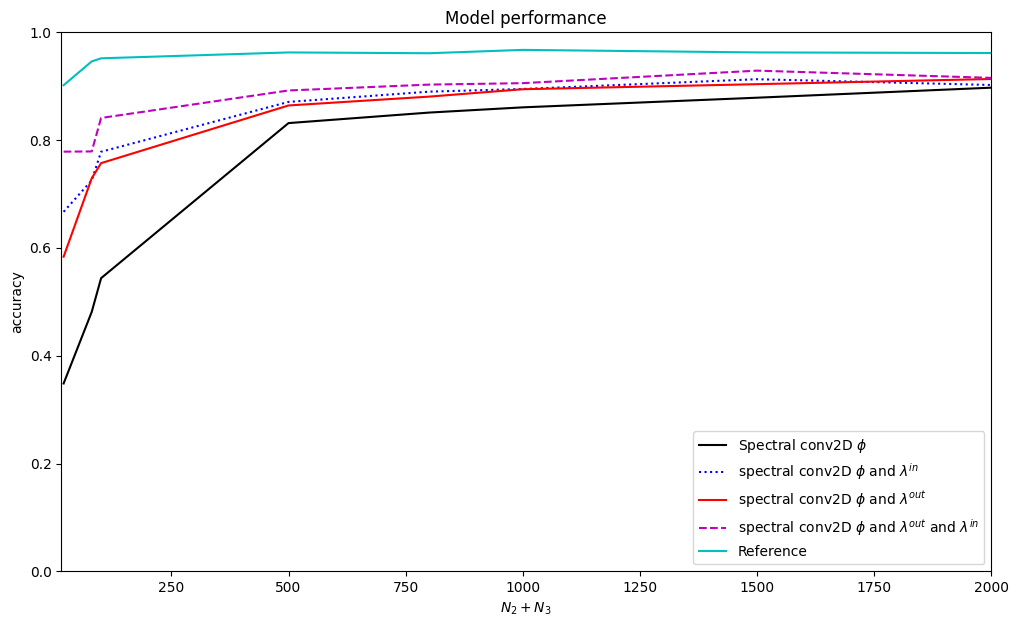

In [26]:
fig=plt.figure(num=1,figsize=(12,7)) 
plt.plot(N2,score1, "k-")
plt.plot(N2,score2, "b:")
plt.plot(N2,score3, "r")
plt.plot(N2,score4, "m--"  )
plt.plot(N2,score5, "c"  )




plt.axis([15, 2000, 0, 1])


plt.xlabel("$N_{2}+N_{3}$")
plt.ylabel("accuracy")
plt.title("Model performance")

 #'ConvNet constraint',
plt.legend(['Spectral conv2D $\phi$',
            'spectral conv2D $\phi$ and $\lambda^{in}$',
            'spectral conv2D $\phi$ and $\lambda^{out}$',
           'spectral conv2D $\phi$ and $\lambda^{out}$ and $\lambda^{in} $',
           'Reference'],
           loc='lower right')

plt.show()